## Modele predictif
Pour la dernière étape nous allons entraîner notre modèle et vérifier sa précision


In [1]:
# Librairies
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Config matplotlib
sns.set(style="whitegrid")


Chargement des données

In [2]:

X_train = pd.read_csv("/content/X_train.csv")
X_val   = pd.read_csv("/content/X_val.csv")
X_test  = pd.read_csv("/content/X_test.csv")

y_train = pd.read_csv("/content/y_train.csv").squeeze()
y_val   = pd.read_csv("/content/y_val.csv").squeeze()
y_test  = pd.read_csv("/content/y_test.csv").squeeze()

print("Shapes:")
print("Train:", X_train.shape, y_train.shape)
print("Val:", X_val.shape, y_val.shape)
print("Test:", X_test.shape, y_test.shape)

Shapes:
Train: (1520, 4) (1520,)
Val: (380, 4) (380,)
Test: (380, 4) (380,)


Définition des modèles

In [3]:
models = {
    "XGBoost": XGBClassifier(
        objective="multi:softmax",
        num_class=3,
        eval_metric="mlogloss",
        use_label_encoder=False,
        random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        random_state=42
    )
}


Entraînement et évaluation


===== Modèle : XGBoost =====



/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:13:25] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy train: 0.925
Accuracy val: 0.42105263157894735
Accuracy test: 0.4921052631578947

Classification report (val):
               precision    recall  f1-score   support

   Extérieur       0.32      0.38      0.34       109
         Nul       0.20      0.15      0.17        87
    Domicile       0.57      0.58      0.57       184

    accuracy                           0.42       380
   macro avg       0.36      0.37      0.36       380
weighted avg       0.41      0.42      0.42       380



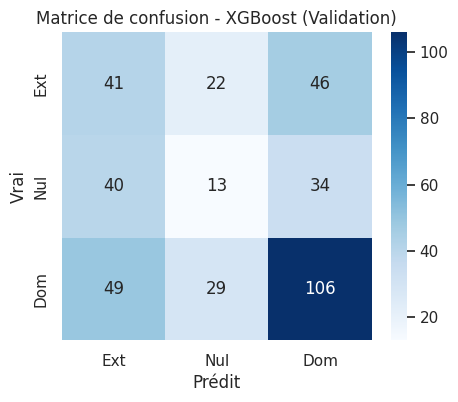

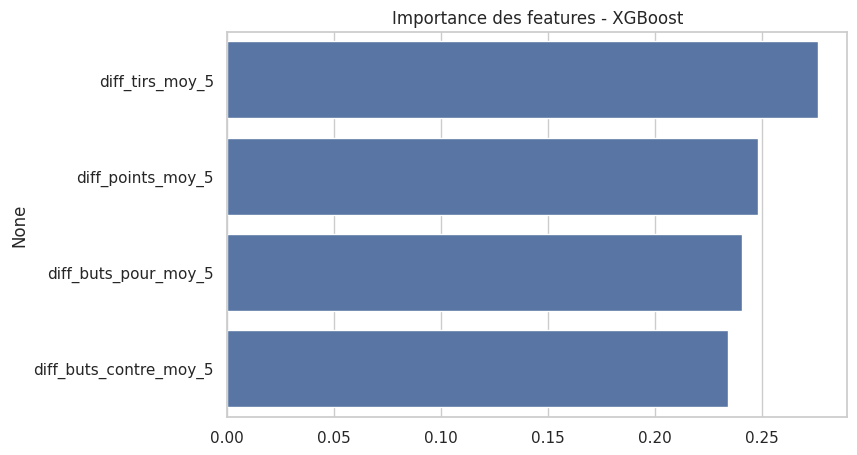


===== Modèle : RandomForest =====

Accuracy train: 0.9907894736842106
Accuracy val: 0.44473684210526315
Accuracy test: 0.4842105263157895

Classification report (val):
               precision    recall  f1-score   support

   Extérieur       0.34      0.47      0.40       109
         Nul       0.28      0.16      0.20        87
    Domicile       0.57      0.57      0.57       184

    accuracy                           0.44       380
   macro avg       0.40      0.40      0.39       380
weighted avg       0.44      0.44      0.44       380



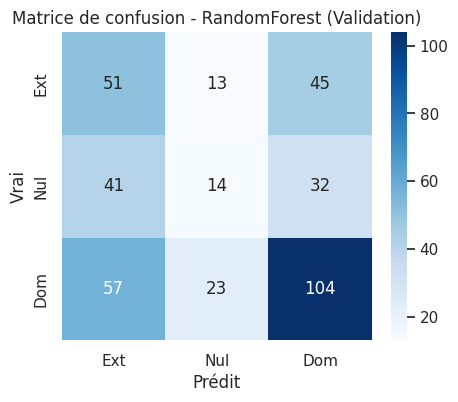

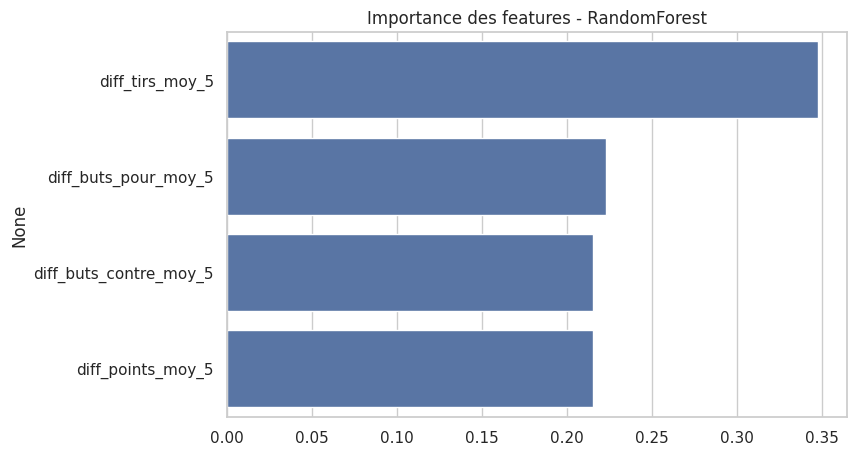

In [4]:
results = {}

for name, model in models.items():
    print(f"\n===== Modèle : {name} =====\n")


    model.fit(X_train, y_train)

    y_pred_train = model.predict(X_train)
    y_pred_val   = model.predict(X_val)
    y_pred_test  = model.predict(X_test)

    acc_train = accuracy_score(y_train, y_pred_train)
    acc_val   = accuracy_score(y_val, y_pred_val)
    acc_test  = accuracy_score(y_test, y_pred_test)

    results[name] = {
        "train": acc_train,
        "val": acc_val,
        "test": acc_test
    }

    print("Accuracy train:", acc_train)
    print("Accuracy val:", acc_val)
    print("Accuracy test:", acc_test)
    print("\nClassification report (val):\n", classification_report(y_val, y_pred_val, target_names=["Extérieur", "Nul", "Domicile"]))

    cm = confusion_matrix(y_val, y_pred_val)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ext", "Nul", "Dom"], yticklabels=["Ext", "Nul", "Dom"])
    plt.title(f"Matrice de confusion - {name} (Validation)")
    plt.ylabel("Vrai")
    plt.xlabel("Prédit")
    plt.show()

    importances = model.feature_importances_
    feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    sns.barplot(x=feat_imp.values, y=feat_imp.index)
    plt.title(f"Importance des features - {name}")
    plt.show()


Comparaison globale

In [5]:
df_results = pd.DataFrame(results).T
print("\n=== Comparaison des modèles ===")
print(df_results)


=== Comparaison des modèles ===
                 train       val      test
XGBoost       0.925000  0.421053  0.492105
RandomForest  0.990789  0.444737  0.484211


Conclusion

In [7]:
best_model = df_results["val"].idxmax()
print(f"\nLe meilleur modèle sur validation est : {best_model} avec une accuracy de {df_results.loc[best_model, 'val']:.2f}")




Le meilleur modèle sur validation est : RandomForest avec une accuracy de 0.44
